In [15]:
# Import packages
import importlib
import os
import time
import numpy as np
import gc
import mosa
from paretoset import paretoset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

In [2]:
# -------------- PART 0a: CHOOSE CIRCUIT AND SET UP FOLDER --------------                            #<--------- SAME AS CODE1 UP TO...

# Choose circuit
circuit = input("Please enter name of the circuit: ")

# Import circuit config file
config = importlib.import_module(circuit)

# Define subfolder name to work in
folder_name = f"MOSA_{circuit}"

# Create folder if not yet exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Jump to folder
os.chdir(folder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")   

Current working directory: /Users/nt625/Documents/GitHub/My5thMOSArepository_plsdontcrash/TwoSpeciesCircuits/MOSA_posneg


In [3]:
# -------------- PART 0d: CHOOSE SENSITIVITY FUNCTIONS --------------

# Print prompt
print("""
We have the following sensitivity functions:
0. |S_betax_xss|
1. |S_betax_yss|
2. |S_betay_xss|
3. |S_betay_yss|
4. |S_n_xss|
5. |S_n_yss|
""")

# Choose pair of functions
choice1 = int(input("Please select first option number:"))
choice2 = int(input("Please select second option number:"))

# List of sensitivity function names
sensitivity_labels = [
    "|S_betax_xss|",
    "|S_betax_yss|",
    "|S_betay_xss|",
    "|S_betay_yss|",
    "|S_n_xss|",
    "|S_n_yss|"]

# Save function names for later use
label1 = sensitivity_labels[choice1]
label2 = sensitivity_labels[choice2]

# -------------- PART 0e: CHANGING DIRECTORIES --------------

# Define the subfolder name
subfolder_name = f"MOSA_sensfuncs_{choice1}_and_{choice2}"

# Create folder if not yet exist
if not os.path.exists(subfolder_name):
    os.makedirs(subfolder_name)

# Jump to folder
os.chdir(subfolder_name)

# Prompt new folder name
print(f"Current working directory: {os.getcwd()}")


We have the following sensitivity functions:
0. |S_betax_xss|
1. |S_betax_yss|
2. |S_betay_xss|
3. |S_betay_yss|
4. |S_n_xss|
5. |S_n_yss|

Current working directory: /Users/nt625/Documents/GitHub/My5thMOSArepository_plsdontcrash/TwoSpeciesCircuits/MOSA_posneg/MOSA_sensfuncs_0_and_1


In [4]:
# -------------------- NEW STUFF --------------------

In [4]:
runs = int(input("How many MOSA runs did you run: "))

In [5]:
runs

2

In [6]:
# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto front
    pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{run}.npy", allow_pickle=True)
    pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))

    # There may be NaNs in the array. Pareto minimisation will think NaNs are minimum. We don't want this. Let's replace NaNs with infinities.
    pareto_front = np.where(np.isnan(pareto_front), np.inf, pareto_front)

    # Compute mask
    mask = paretoset(pareto_front, sense=["min", "min"])

    print(f"Run: {run}")
    if sum(mask) == len(pareto_sensfunc1):
        print("is good")

Run: 1
is good
Run: 2
is good


In [7]:
# Initialize an empty array for storing Pareto front values
total_paretofront = np.empty((0, 2))

# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto front
    pareto_sensfunc1 = np.load(f"pareto_sensfunc1_run{run}.npy", allow_pickle=True)
    pareto_sensfunc2 = np.load(f"pareto_sensfunc2_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_front = np.column_stack((pareto_sensfunc1, pareto_sensfunc2))

    # Append to the total Pareto front
    total_paretofront = np.vstack((total_paretofront, pareto_front))

# Now, total_paretofront contains all runs stacked together
np.shape(total_paretofront)

(62, 2)

In [11]:
mask2 = paretoset(total_paretofront, sense=["min", "min"])
filtered_total_paretofront = total_paretofront[mask2]
np.shape(filtered_total_paretofront)

(61, 2)

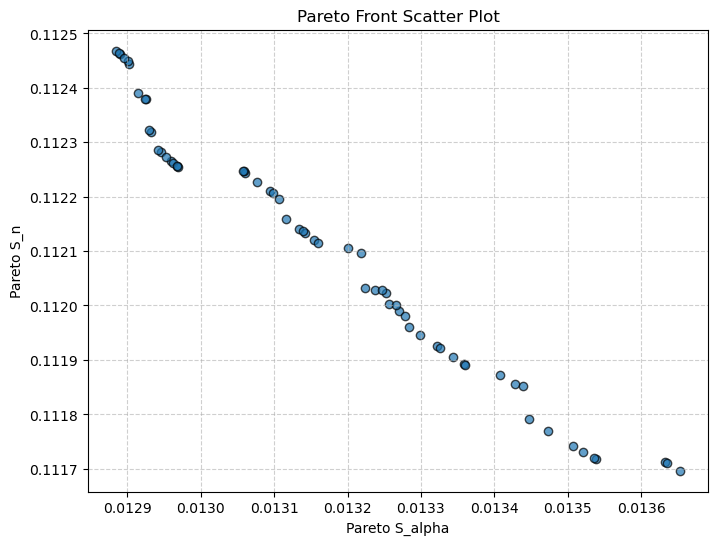

In [9]:
# Extract columns
x = total_paretofront[:, 0]  # First column
y = total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

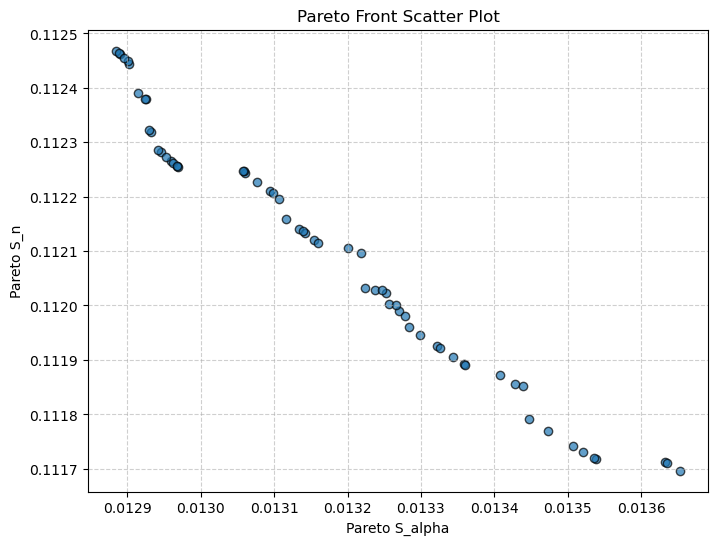

In [10]:
# Extract columns
x_maxruns = filtered_total_paretofront[:, 0]  # First column
y_maxruns = filtered_total_paretofront[:, 1]  # Second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x_maxruns, y_maxruns, alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel("Pareto S_alpha")
plt.ylabel("Pareto S_n")
plt.title("Pareto Front Scatter Plot")

# Show grid for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()

In [13]:
# ---- corresponding parameters ----

# Initialize an empty array for storing Pareto parameters
total_paretoparams = np.empty((0, 3))

# Loop through runs
for run in range(1, runs + 1):
    # Load the parameter values for that run's Pareto parameters
    pareto_betax = np.load(f"pareto_betax_run{run}.npy", allow_pickle=True)
    pareto_betay = np.load(f"pareto_betay_run{run}.npy", allow_pickle=True)
    pareto_n = np.load(f"pareto_n_run{run}.npy", allow_pickle=True)

    # Stack the two arrays as columns
    pareto_params = np.column_stack((pareto_betax, pareto_betay, pareto_n))

    # Append to the total Pareto front
    total_paretoparams = np.vstack((total_paretoparams, pareto_params))

# Now, total_paretoparams contains all runs stacked together
np.shape(total_paretoparams)

(62, 3)

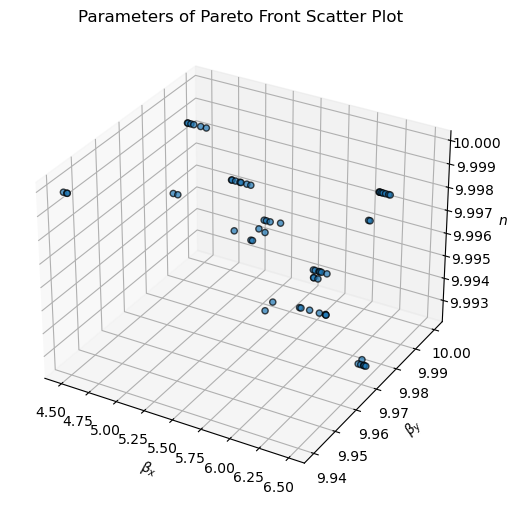

In [16]:
# Apply mask to get filtered parameters
filtered_total_paretoparams = total_paretoparams[mask2]

# Extract columns correctly from the filtered dataset
x = filtered_total_paretoparams[:, 0]  # First column
y = filtered_total_paretoparams[:, 1]  # Second column
z = filtered_total_paretoparams[:, 2]  # Third column

# Create 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')  # 3D subplot

# Scatter plot with 3D points
ax.scatter(x, y, z, alpha=0.7, edgecolors='k')

# Labels and title
ax.set_xlabel(r"$\beta_x$")
ax.set_ylabel(r"$\beta_y$")
ax.set_zlabel(r"$n$")
ax.set_title("Parameters of Pareto Front Scatter Plot")

# Show grid for better visualization
ax.grid(True, linestyle='--', alpha=0.6)

# Display plot
plt.show()